# Chapter 19: Classification Models and Evaluation
## Exercises solutions

## Exercise 1
Implement your own version of the classification metrics precision, recall and F1 score.  

In [32]:
# import  the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us create some dummy data for testing:

In [53]:
# ground truth labels: 1 is our positive class, which is the class we want to detect (e.g., spam email, malignus cancer)
true = [0, 2, 1, 0, 1, 1, 0, 0, 1, 2]
# predicted labels 
pred = [0, 1, 0, 0, 0, 1, 1, 0, 1, 0]

In the above example, out of 10 labels our classifier predicted:
- 2 true positives
- 2 false positives
- 4 true negatives  
- 2 false negatives

### Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives and measures the ability of a classifier of not labeling as positive a sample that is negative.

In [66]:
def precision(true, pred, pos_lab = 1):
    
    '''
    Function:
            calculates the precision score. 
    
    Inputs:
            true labels (list), predictions (list), positive_label (int, str)
    
    Output:
            precision score (float)
    '''

    if len(true) != len(pred):
        raise ValueError (f'True and predicted labels should have the same length. Received sizes ({len(true)}, {len(pred)}).')
    tp = 0 # true positives
    fp = 0 # false positives
    for i in range(len(true)):
        if true[i] == pos_lab and pred[i] == pos_lab:
            tp += 1
        if true[i] != pos_lab and pred[i] == pos_lab:
            fp += 1
    # avoid division by 0
    if tp == 0 and fp == 0:
        precision = 0  
        return precision
    # precision formula   
    precision = tp / (tp + fp)
    return precision


In [76]:
# test the precision formula
print(f'Precision: {precision(true, pred)}')

Precision: 0.5


### Recall
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives and measures the ability of the classifier to identify all the positive samples.

In [68]:
def recall(true, pred, pos_lab = 1):
    
    '''
    Function:
            calculates the recall score 
    
    Inputs:
            true labels (list), predictions (list), positive_label (int, str)
    
    Output:
            recall score (float)
    '''

    if len(true) != len(pred):
        raise ValueError (f'True and predicted labels should have the same length. Received sizes ({len(true)}, {len(pred)}).')
    tp = 0 # true positives
    fn = 0 # negative labels
    for i in range(len(true)):
        if true[i] == pos_lab and pred[i] == pos_lab:
            tp += 1
        if true[i] == pos_lab and pred[i] != pos_lab:
            fn += 1
    if tp == 0 and fn == 0:
        recall = 0
        return recall         
    # recall formula 
    recall = tp / (tp + fn)
    return recall

In [73]:
# test the precision formula
print(f'Recall: {recall(true, pred)}')

Recall: 0.5


### F1 Score
The F1 score is the harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall) hence measures the model performance as a function of precision and recall. 

In [77]:
def f1(true, pred, pos_lab = 1):
    
    '''
    Function:
            calculates the F1 score 
    
    Inputs:
            true labels (list), predictions (list), positive_label (int, str)
    
    Output:
            F1 score (float)
    '''
    
    if len(true) != len(pred):
        raise ValueError (f'True and predicted labels should have the same length. Received sizes ({len(true)}, {len(pred)}).')
    tp = 0 # true positives
    fp = 0 # false positives
    fn = 0 # false negatives
    for i in range(len(true)):
        if true[i] == pos_lab and pred[i] == pos_lab:
            tp += 1
        if true[i] != pos_lab and pred[i] == pos_lab:
            fp += 1
        if true[i] == pos_lab and pred[i] != pos_lab:
            fn += 1
    # avoid divisions by zero
    if tp == 0 and fp == 0:
        precision = 0  
    else:
        precision = tp / (tp + fp)
    if tp == 0 and fn == 0:
        recall = 0  
    else:
        recall = tp / (tp + fn)
    if precision + recall == 0:
        f1 = 0
        return f1
    # f1 formula 
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [80]:
# test the precision formula
print(f'F1 Score: {f1(true, pred)}')

F1 Score: 0.5


## Exercise 2
Load the *digits* dataset and test the classifiers introduced in this chapter on it.  

### Dataset

In [81]:
# import the modules
import sklearn
from sklearn.datasets import load_digits

# load the dataframe 
df = load_digits()

In [82]:
# store the features in a variable X
X = df.data
# store the targets in a variable y 
y = df.target

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(df)}\n')
# show the dataset keys
print(f'Dataset attributes: \n{df.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{df.feature_names}\n')
# these are our targets (y)
print(f'Target: \n{df.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(df.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Feaures names: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixe

<Figure size 640x480 with 0 Axes>

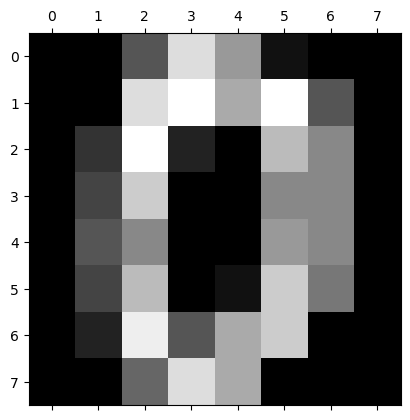

In [83]:
import matplotlib.pyplot as plt
# show an image from the dataset
plt.gray()
plt.matshow(df.images[0]);

### Data Preparation
We start creating the train and test sets:

In [84]:
from sklearn.model_selection import train_test_split 

# set the seed to promote the reproducibility of the results (it controls the randomness in the splits in this case)
seed = 0

# split features and targets in train and test sets (with stratification).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed, stratify = y)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 1257
Number of targets in the training set: 1257
Number of features in the test set: 540
Number of targtes in the test set: 540


We normalise the features:

In [85]:
from sklearn.preprocessing import StandardScaler 

# scale the features
sclr = StandardScaler() 
X_train_scl = sclr.fit_transform(X_train) # scale to 0 mean and std dev 1 on training data 
X_test_scl = sclr.transform(X_test) 

print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: -1.589818173687575e-18, X_train_scl std: 0.9682458365518543
X_test_scl mean: 0.002949341824474758, X_test_scl std: 1.1151159288845494


### Models Training and Testing

In [86]:
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier  
from sklearn.tree import DecisionTreeClassifier 
import time

# build the models 
dtc = DecisionTreeClassifier() 
gnb = GaussianNB() 
lr = LogisticRegression(max_iter=2000,random_state=0) 
mlp = MLPClassifier(max_iter=2000,random_state=0) 

# loop through the models, train and test them
for mdl in [dtc, gnb, lr,  mlp]:
    start = time.time() 
    mdl.fit(X_train_scl,y_train) 
    t_time = time.time()- start
    print(mdl, f'\nTraining mean accuracy: {mdl.score(X_train_scl,y_train):.4f} - Test mean accuracy: {mdl.score(X_test_scl,y_test):.4f} - Time to train: {(t_time):.4f}\n') 

DecisionTreeClassifier() 
Training mean accuracy: 1.0000 - Test mean accuracy: 0.8574 - Time to train: 0.0106

GaussianNB() 
Training mean accuracy: 0.8210 - Test mean accuracy: 0.8111 - Time to train: 0.0020

LogisticRegression(max_iter=2000, random_state=0) 
Training mean accuracy: 0.9984 - Test mean accuracy: 0.9741 - Time to train: 0.0625

MLPClassifier(max_iter=2000, random_state=0) 
Training mean accuracy: 1.0000 - Test mean accuracy: 0.9759 - Time to train: 0.6961



We can observe that different models not only show different levels of adaptation and generalization, but need also different times for training. 

## Exercise 3
Implement parameter tuning on the digits datasets for the logistic regression and the MLP classifier.  

### Tuning the Logistic Regression

In [11]:
from sklearn.model_selection import GridSearchCV
# soppress warnings
import warnings
warnings.filterwarnings("ignore")

# set the parameters to search
lr_parameters = {'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                 'C': np.arange(0.1, 1, 0.1)}

# set a 5 fold nested grid search and use test the logistic regression classifier previously built
clf = GridSearchCV(lr, lr_parameters, cv = 5)
clf.fit(X_train_scl, y_train)

# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.040887,0.008008,0.000201,0.000402,0.7,l2,"{'C': 0.7000000000000001, 'penalty': 'l2'}",0.968254,0.97619,0.952191,0.964143,0.972112,0.966578,0.008231,1
17,0.036629,0.006812,0.000000,0.000000,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.972222,0.97619,0.952191,0.960159,0.972112,0.966575,0.008978,2
21,0.035941,0.001554,0.000200,0.000400,0.6,l2,"{'C': 0.6, 'penalty': 'l2'}",0.972222,0.97619,0.952191,0.960159,0.972112,0.966575,0.008978,2


### Testing the Logistic Regression
We re-train the logistic regression classifier with the best hyperparameters and test it on the test set:

In [12]:
lr_tuned = LogisticRegression(C = 0.7, penalty = 'l2', max_iter=2000,random_state=0) 
lr_tuned.fit(X_train_scl, y_train)
print(f'Test mean accuracy: {lr_tuned.score(X_test_scl,y_test):.4f}')

Test mean accuracy: 0.9741


Despite the tuning, we are unable to improve the logistic regression mean accuracy on the test set. That was already a very high score though! 

### Tuning the MLP
**Note**: The below cell may take a few minutes to complete. <br>We searched a relatively large hyperparemter space (36 combinations) and the MLP is a computationally expensive model to run (as seen above). If you wish to speed up your tuning, remove some parameters from the below *mlp_param* dictionary: 

In [13]:
# MLP - we can specify its architecture by defining the number of neurons at each layer 
mlp_param = {'hidden_layer_sizes': [(50), (100,), (50, 50)],
             'activation': ['identity','logistic', 'tanh', 'relu'], # Activation function for the hidden layer
             'solver': ['lbfgs', 'sgd', 'adam'], # The solver for weight optimization
             'max_iter': [2000]}

# set a 5 fold nested grid search and use test the logistic regressor previously built
clf = GridSearchCV(mlp, mlp_param, cv = 5)
clf.fit(X_train_scl, y_train)

# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.805281,0.065060,0.000401,0.000491,relu,"(100,)",2000,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.97619,0.988095,0.980080,0.976096,0.964143,0.976921,0.007737,1
29,0.837741,0.054502,0.000386,0.000473,relu,50,2000,adam,"{'activation': 'relu', 'hidden_layer_sizes': 5...",0.97619,0.988095,0.960159,0.960159,0.972112,0.971343,0.010534,2
31,2.196593,0.069572,0.000200,0.000400,relu,"(100,)",2000,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.97619,0.980159,0.964143,0.968127,0.964143,0.970553,0.006513,3


In [14]:
# display the best hyperparameters
clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'max_iter': 2000,
 'solver': 'adam'}

The above hyperparameters are the same as the default ones (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), meaning that we could not find a better model than the one we already implemented. However, we achieved a mean accuracy of 0.9759 on the test set, which is really high!

## Exercise 4
Load the *Wisconsin breast cancer dataset* and predict the tumor type. Use different models, tune their hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models.  

## Dataset

In [87]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [88]:
# store the features in a variable X
X = df.data
# store the targets in a variable y 
y = df.target

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(df)}\n')
# show the dataset keys
print(f'Dataset attributes: \n{df.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{df.feature_names}\n')
# these are our targets (y)
print(f'Target: \n{df.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(df.data)}')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feaures names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: 
['malignant' 'benign']

Number of samples: 
569


### Data Preparation
We start creating the train and test sets:

In [89]:
from sklearn.model_selection import train_test_split 

# set the seed to promote the reproducibility of the results (it controls the randomness in the splits in this case)
seed = 0

# split features and targets in train and test sets (with stratification).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = seed, stratify = y)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 455
Number of targets in the training set: 455
Number of features in the test set: 114
Number of targtes in the test set: 114


We normalise the features:

In [90]:
from sklearn.preprocessing import StandardScaler 
# scale the features
sclr = StandardScaler() 
X_train_scl = sclr.fit_transform(X_train) # scale to 0 mean and std dev 1 on training data 
X_test_scl = sclr.transform(X_test) 

print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: 1.0827317878249146e-16, X_train_scl std: 0.9999999999999999
X_test_scl mean: 0.01146158680974278, X_test_scl std: 1.0398570731281607


### Models Training and Testing

In [27]:
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier  
from sklearn.tree import DecisionTreeClassifier 
import time

# build the models 
dtc = DecisionTreeClassifier() 
gnb = GaussianNB() 
lr = LogisticRegression(max_iter=2000,random_state=0) 
mlp = MLPClassifier(max_iter=2000,random_state=0) 

# loop through the models, train and test them
for mdl in [dtc, gnb, lr,  mlp]:
    start = time.time() 
    mdl.fit(X_train_scl,y_train) 
    t_time = time.time()- start
    print(mdl, f'\nTraining mean accuracy: {mdl.score(X_train_scl,y_train):.4f} - Test mean accuracy: {mdl.score(X_test_scl,y_test):.4f} - Time to train: {(t_time):.4f}\n') 

DecisionTreeClassifier() 
Training mean accuracy: 1.0000 - Test mean accuracy: 0.9035 - Time to train: 0.0042

GaussianNB() 
Training mean accuracy: 0.9363 - Test mean accuracy: 0.9035 - Time to train: 0.0010

LogisticRegression(max_iter=2000, random_state=0) 
Training mean accuracy: 0.9890 - Test mean accuracy: 0.9825 - Time to train: 0.0070

MLPClassifier(max_iter=2000, random_state=0) 
Training mean accuracy: 1.0000 - Test mean accuracy: 0.9561 - Time to train: 0.4959



### Models Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
# soppress warnings
import warnings
warnings.filterwarnings("ignore")

# set the hyperparameters to search for the decision tree
dtc_param = {'max_depth':np.arange(1, 20, 4), 
                  'min_samples_split':np.arange(2, 8, 2),
                  'min_samples_leaf':np.arange(1, 20, 4)}

# set the hyperparameters to search for the gaussian naive bayes
gnb_param = {'var_smoothing': [1e-09, 1e-08, 1e-07]}

# set the hyperparameters to search for the logistic regression
lr_param = {'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                 'C': np.arange(0.1, 1, 0.1)}

# set the hyperparameters to search for the multi layer perceptron
mlp_param = {'hidden_layer_sizes': [(50), (100,)],
             'activation': ['identity','logistic', 'tanh', 'relu'], # Activation function for the hidden layer
             'solver': ['lbfgs', 'sgd', 'adam'], # The solver for weight optimization
             'max_iter': [2000]}

# store all the hyperparameters here
hyperparameters = [dtc_param, gnb_param, lr_param, mlp_param]
# store all the models here
models = [dtc, gnb, lr,  mlp]

# loop through the models and their hyperparameters and print the best hyperparameters
for i in range(len(models)):
    clf = GridSearchCV(models[i], hyperparameters[i], cv = 5)
    clf.fit(X_train_scl, y_train)
    print(f'{models[i]}:\n{clf.best_params_}\n')
    

DecisionTreeClassifier():
{'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 4}

GaussianNB():
{'var_smoothing': 1e-09}

LogisticRegression(max_iter=2000, random_state=0):
{'C': 0.2, 'penalty': 'l2'}

MLPClassifier(max_iter=2000, random_state=0):
{'activation': 'logistic', 'hidden_layer_sizes': 50, 'max_iter': 2000, 'solver': 'adam'}



### Testing

We re-train the models with the best hyperparameters and test them on the test set:

In [91]:
# build the models 
dtc = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = 5, min_samples_split = 4) 
gnb = GaussianNB(var_smoothing = 1e-09) 
lr = LogisticRegression(C = 0.2, penalty = 'l2', max_iter=2000,random_state=0) 
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes = 50, max_iter = 2000, solver = 'adam', random_state=0) 

# loop through the models, train and test them
for mdl in [dtc, gnb, lr,  mlp]:
    start = time.time() 
    mdl.fit(X_train_scl,y_train) 
    t_time = time.time()- start
    print(mdl, f'\nTest mean accuracy: {mdl.score(X_test_scl,y_test):.4f} - Time to train: {(t_time):.4f}\n') 


DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=4) 
Test mean accuracy: 0.9298 - Time to train: 0.0037

GaussianNB() 
Test mean accuracy: 0.9035 - Time to train: 0.0010

LogisticRegression(C=0.2, max_iter=2000, random_state=0) 
Test mean accuracy: 0.9649 - Time to train: 0.0193

MLPClassifier(activation='logistic', hidden_layer_sizes=50, max_iter=2000,
              random_state=0) 
Test mean accuracy: 0.9737 - Time to train: 0.2309



The Decision Tree and the MLP improved their accuracy on the test set (*generalization*) after hyperparameters tuning. It is especially interesting to note how the MLP classifier achieved a better performance with a smaller architecture (50 hidden neurons instead of 100) and a different activation function (logistic vs relu). <br> We can explore how the MLP makes its predictions like so:

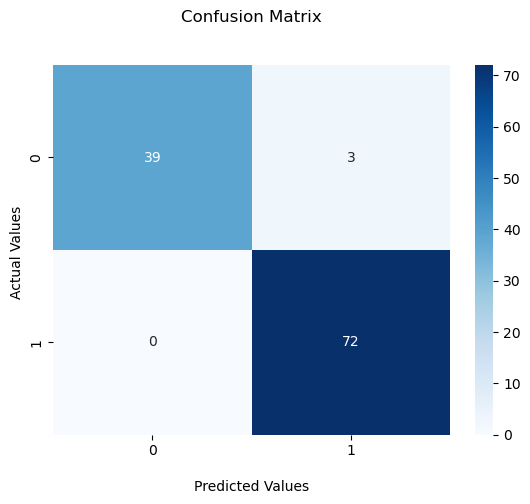

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# make predictions (mdl is the last model from the previous loop, i.e., the MLP)
y_pred = mdl.predict(X_test_scl)

#Print confusion matrix...
cf_matrix = confusion_matrix( y_test, y_pred) 
cf_matrix_norm = cf_matrix.astype('float')

ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

We need to be careful because the way the dataset is labelled could be misleading: *malignant*, which is the positive class and the one we want to detect, is labelled as 0 (counterintuitively) and *benign* as 1. We can use the functions we previously built to measure our model performance, and perhaps better understand the above confusion matrix: 

In [109]:
print(f'Precision: {precision(y_test, y_pred, 0)}')
print(f'Recall: {recall(y_test, y_pred, 0)}')
print(f'F1: {f1(y_test, y_pred, 0)}')

Precision: 1.0
Recall: 0.9285714285714286
F1: 0.962962962962963


Our model returns 0 false positives (high precision) but misses to identify 3 malignant tumors (false negatives). This is not an optimal model behaviour because in a real setting this would mean misdiagnosing 3 people with a malignant cancer. In this scenario, we would rather have a lower precision but a better recall. Better safe than sorry...    

## Exercise 5
Load the Covertype dataset and predict the classes. Model this multi-class problem with different models and determine their optimal hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models. 

In [110]:
# if you get (Error -3) when importing this dataset go to "/Users/{home_folder}/scikit_learn_data/cover_type" and delete the samples_py3 file. 
from sklearn.datasets import fetch_covtype
df = fetch_covtype()

In [111]:
# store the features in a variable X
X = df.data
# store the targets in a variable y 
y = df.target

# show the dataset keys
print(f'Dataset attributes: \n{df.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{df.feature_names}\n')
# these are our targets (y)
print(f'Target: \n{df.target_names}\n')
# print the classes names 
print(f'Classes: \n{set(df.target)}\n')
# number of samples
print(f'Number of samples: \n{len(df.data)}')

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Feaures names: 
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'So

### Data Preparation

We start creating the train and test sets:

In [112]:
from sklearn.model_selection import train_test_split 

# set the seed to promote the reproducibility of the results (it controls the randomness in the splits in this case)
seed = 0

# split features and targets in train and test sets (with stratification).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed, stratify = y)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 406708
Number of targets in the training set: 406708
Number of features in the test set: 174304
Number of targtes in the test set: 174304


We normalise the features:

In [113]:
from sklearn.preprocessing import StandardScaler 
# scale the features
sclr = StandardScaler() 
X_train_scl = sclr.fit_transform(X_train) # scale to 0 mean and std dev 1 on training data 
X_test_scl = sclr.transform(X_test) 

print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: 6.284881784727393e-18, X_train_scl std: 1.0000000000002802
X_test_scl mean: -4.70230698938807e-05, X_test_scl std: 0.9999097325165021


### Models Training and Testing

In [27]:
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier  
from sklearn.tree import DecisionTreeClassifier 
import time

# build the models 
dtc = DecisionTreeClassifier() 
gnb = GaussianNB() 
lr = LogisticRegression(max_iter=2000,random_state=0) 
mlp = MLPClassifier(max_iter=2000,random_state=0) 

# loop through the models, train and test them
for mdl in [dtc, gnb, lr, mlp]:
    start = time.time() 
    mdl.fit(X_train_scl,y_train) 
    t_time = time.time()- start
    print(mdl, f'\nTraining mean accuracy: {mdl.score(X_train_scl,y_train):.4f} - Test mean accuracy: {mdl.score(X_test_scl,y_test):.4f} - Time to train: {(t_time):.4f}\n') 

DecisionTreeClassifier() 
Training mean accuracy: 1.0000 - Test mean accuracy: 0.9354 - Time to train: 4.3820

GaussianNB() 
Training mean accuracy: 0.0881 - Test mean accuracy: 0.0880 - Time to train: 0.2361

LogisticRegression(max_iter=2000, random_state=0) 
Training mean accuracy: 0.7244 - Test mean accuracy: 0.7248 - Time to train: 137.6145

MLPClassifier(max_iter=2000, random_state=0) 
Training mean accuracy: 0.8773 - Test mean accuracy: 0.8733 - Time to train: 386.5008



The dataset is much larger than the previous ones and the difference in training times between the models becomes more substantial. This is something especially important to keep in mind in model selection and when we run the gridsearch for hyperparameters tuning. Since the decision tree was the best performer and very quick to train, in this case we will focus just on tuning its hyperparameters. The MLP took about 93 times longer to train!

### Model Tuning
**Note:** The cell below may take 10 minutes or lunger to run. <br>
We fine tune the decision tree that is the best model in terms of performance and training times:

In [24]:
from sklearn.model_selection import GridSearchCV
# soppress warnings
import warnings
warnings.filterwarnings("ignore")

# set the hyperparameters to search for the decision tree
dtc_param = {'max_depth':np.arange(1, 17, 5), 
                  'min_samples_split':np.arange(1, 17, 5),
                  'min_samples_leaf':np.arange(1, 17, 5)}


clf = GridSearchCV(dtc, dtc_param, cv = 5,)
clf.fit(X_train_scl, y_train)
# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,3.166164,0.139585,0.020091,0.005735,16,1,6,"{'max_depth': 16, 'min_samples_leaf': 1, 'min_...",0.859753,0.863576,0.860023,0.863193,0.858608,0.861031,0.001984,1
50,2.813059,0.123110,0.012917,0.008818,16,1,11,"{'max_depth': 16, 'min_samples_leaf': 1, 'min_...",0.858634,0.862580,0.858585,0.862554,0.857784,0.860027,0.002096,2
51,2.746378,0.032168,0.018482,0.007021,16,1,16,"{'max_depth': 16, 'min_samples_leaf': 1, 'min_...",0.857650,0.861154,0.857589,0.861189,0.856272,0.858771,0.002021,3


In [28]:
print(f'{dtc}:\n{clf.best_params_}')

DecisionTreeClassifier():
{'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 6}


### Testing

In [117]:
dtc = DecisionTreeClassifier(max_depth = 16, min_samples_leaf = 1, min_samples_split = 6) 
dtc.fit(X_train_scl,y_train) 
print(dtc, f'\nTest mean accuracy: {dtc.score(X_test_scl,y_test):.4f}') 

DecisionTreeClassifier(max_depth=16, min_samples_split=6) 
Test mean accuracy: 0.8642


Despite searching for the best hyperparameters, we notice how the new tree does actually perform worse than the original one. Through a grid search in fact we only search our defined parameters space and, unless we set a very large number of parameters, we may be missing the best combination. In this example, for instance, we set the *min_samples_split* to be a multiple of 5 in a range 1 - 16, therefore a value among [1,  6, 11, 16], to test a relatively large space, but this way we lose in granularity and skip the default value 2, which in this case seems to work better. As we realised that, we could try to test [2, 3, 4, 5] instead, and a similarly choose different values for *max_depth*:

In [121]:
# set the hyperparameters to search for the decision tree
dtc_param = {'max_depth': [20, 40, 60],
             'min_samples_leaf': [2, 3, 4, 5]}


clf = GridSearchCV(dtc, dtc_param, cv = 5,)
clf.fit(X_train_scl, y_train)
# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,3.318715,0.029800,0.021977,0.000643,40,2,"{'max_depth': 40, 'min_samples_leaf': 2}",0.923754,0.924024,0.923434,0.925560,0.922524,0.923859,0.000990,1
8,3.313637,0.008974,0.024633,0.004440,60,2,"{'max_depth': 60, 'min_samples_leaf': 2}",0.923840,0.923926,0.923053,0.925032,0.921921,0.923554,0.001032,2
5,3.330263,0.021762,0.022169,0.000540,40,3,"{'max_depth': 40, 'min_samples_leaf': 3}",0.923324,0.922488,0.922684,0.923446,0.921528,0.922694,0.000688,3


In [122]:
dtc = DecisionTreeClassifier(max_depth = 40, min_samples_leaf = 2, min_samples_split = 2) 
dtc.fit(X_train_scl,y_train) 
print(dtc, f'\nTest mean accuracy: {dtc.score(X_test_scl,y_test):.4f}') 

DecisionTreeClassifier(max_depth=40, min_samples_leaf=2) 
Test mean accuracy: 0.9319


This one is better, even if not quite as good as the original one. The original tree, on this data, seems to be the best option, even if we do realise that it is a tree that is overfitting the data provided. It works in this case, most probabily because the data follows a very distinctive pattern, but we may want to keep an eye on this tree if we were to use it on additional / different data. 

### Model performance

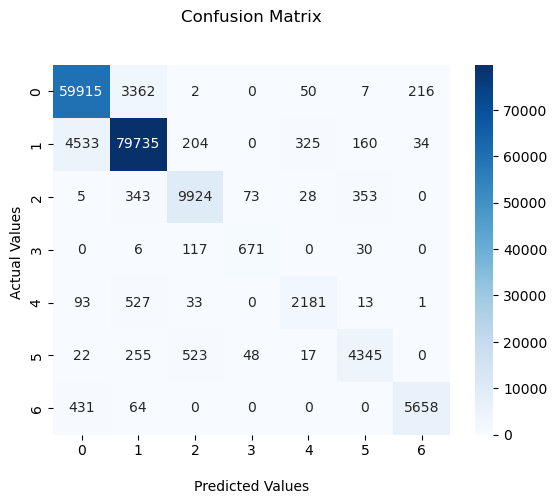

In [138]:
# make predictions 
y_pred = dtc.predict(X_test_scl)

#Print confusion matrix...
cf_matrix = confusion_matrix( y_test, y_pred) 
cf_matrix_norm = cf_matrix.astype('float')

ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

We can messure precision, recall and F1 on each class:

In [142]:
# print metrics on each class 
for i in set(df.target):
    print(f'Metrics on class: {i - 1}\nPrecision: {precision(y_test, y_pred, i)}, Recall: {recall(y_test, y_pred, i)}, F1: {f1(y_test, y_pred, i)}')
  

Metrics on class: 0
Precision: 0.9217834120524931, Recall: 0.942771273917422, F1: 0.9321592208539801
Metrics on class: 1
Precision: 0.945937930052674, Recall: 0.9381581579226036, F1: 0.9420319819473898
Metrics on class: 2
Precision: 0.9186337128575396, Recall: 0.9252284169308223, F1: 0.9219192716800594
Metrics on class: 3
Precision: 0.8472222222222222, Recall: 0.8143203883495146, F1: 0.8304455445544554
Metrics on class: 4
Precision: 0.8385236447520185, Recall: 0.7658005617977528, F1: 0.8005138557533493
Metrics on class: 5
Precision: 0.8852893235533822, Recall: 0.8339731285988484, F1: 0.8588653884166831
Metrics on class: 6
Precision: 0.9575224234218987, Recall: 0.9195514383227694, F1: 0.9381528768031835


We notice how classes 3,4 and 5, which are the ones with the least samples, are the most challenging for the model to predict. If we wanted to improve the model performance on such classes, we should deal with the classes imbalance, as explained in the book (e.g., using SMOTE). 